In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [21]:
# Show data
df = pd.read_csv("dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               30 non-null     object
 1   Debut Year         30 non-null     int64 
 2   Special Powers     30 non-null     int64 
 3   Cunning            30 non-null     int64 
 4   Strength           30 non-null     int64 
 5   Technology         30 non-null     int64 
 6   Top Trumps Rating  30 non-null     int64 
 7   Type               30 non-null     object
dtypes: int64(6), object(2)
memory usage: 2.0+ KB


In [22]:
# Clean data by dropping irrelevant column(s)
df.drop(["Debut Year"], axis=1, inplace=True)

In [23]:
# Split into hero and villain df
heroes = df[df["Type"] == "Hero"].copy()
villains = df[df["Type"] == "Villain"].copy()

# Drop irrelevant column
heroes.drop(["Type"], axis=1, inplace=True)
villains.drop(["Type"], axis=1, inplace=True)

# Create columns to store likelihood of winning against villain
heroes["Wins Against Hela"] = -1
heroes["Wins Against Loki"] = -1
heroes["Wins Against Ultron"] = -1
heroes["Wins Against Green Goblin"] = -1
heroes["Wins Against Doctor Octopus"] = -1
heroes["Wins Against Venom"] = -1
heroes["Wins Against Thanos"] = -1

In [24]:
# For each hero, determine their likelihood of winning against each villain 1-on-1
for i in range(len(heroes)):
    # Determine for each feature is the hero wins (1) or loses (0) (a tie is counted as a loss)
    temp_hela = heroes.iloc[i] > (villains.loc[df['Name'] == "Hela"])
    temp_loki = heroes.iloc[i] > (villains.loc[df['Name'] == "Loki"])
    temp_ultron = heroes.iloc[i] > (villains.loc[df['Name'] == "Ultron"])
    temp_goblin = heroes.iloc[i] > (villains.loc[df['Name'] == "Green Goblin"])
    temp_octopus = heroes.iloc[i] > (villains.loc[df['Name'] == "Doctor Octopus"])
    temp_venom = heroes.iloc[i] > (villains.loc[df['Name'] == "Venom"])
    temp_thanos = heroes.iloc[i] > (villains.loc[df['Name'] == "Thanos"])

    # Drop irrelevant columns "Name", "Wins Against *"
    temp_hela.drop(temp_hela.columns[[0,6,7,8,9,10,11,12]], axis=1, inplace=True)
    temp_loki.drop(temp_loki.columns[[0,6,7,8,9,10,11,12]], axis=1, inplace=True)
    temp_ultron.drop(temp_ultron.columns[[0,6,7,8,9,10,11,12]], axis=1, inplace=True)
    temp_goblin.drop(temp_goblin.columns[[0,6,7,8,9,10,11,12]], axis=1, inplace=True)
    temp_octopus.drop(temp_octopus.columns[[0,6,7,8,9,10,11,12]], axis=1, inplace=True)
    temp_venom.drop(temp_venom.columns[[0,6,7,8,9,10,11,12]], axis=1, inplace=True)
    temp_thanos.drop(temp_thanos.columns[[0,6,7,8,9,10,11,12]], axis=1, inplace=True)

    # Determine probability of hero winning based on winning features
    temp_hela["Wins"] = temp_hela.mean(axis=1)
    temp_loki["Wins"] = temp_loki.mean(axis=1)
    temp_ultron["Wins"] = temp_ultron.mean(axis=1)
    temp_goblin["Wins"] = temp_goblin.mean(axis=1)
    temp_octopus["Wins"] = temp_octopus.mean(axis=1)
    temp_venom["Wins"] = temp_venom.mean(axis=1)
    temp_thanos["Wins"] = temp_thanos.mean(axis=1)

    # Save result in hero df
    heroes.loc[i, "Wins Against Hela"] = temp_hela["Wins"].values[0]
    heroes.loc[i, "Wins Against Loki"] = temp_loki["Wins"].values[0]
    heroes.loc[i, "Wins Against Ultron"] = temp_ultron["Wins"].values[0]
    heroes.loc[i, "Wins Against Green Goblin"] = temp_goblin["Wins"].values[0]
    heroes.loc[i, "Wins Against Doctor Octopus"] = temp_octopus["Wins"].values[0]
    heroes.loc[i, "Wins Against Venom"] = temp_venom["Wins"].values[0]
    heroes.loc[i, "Wins Against Thanos"] = temp_thanos["Wins"].values[0]

#heroes

C:\Users\maria\AppData\Local\Temp\ipykernel_12712\3487550726.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  temp_hela = heroes.iloc[i] > (villains.loc[df['Name'] == "Hela"])
C:\Users\maria\AppData\Local\Temp\ipykernel_12712\3487550726.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  temp_loki = heroes.iloc[i] > (villains.loc[df['Name'] == "Loki"])
C:\Users\maria\AppData\Local\Temp\ipykernel_12712\3487550726.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  temp_ultro

In [25]:
# Convert float if > 0.5 to binary yes (1). else no (0)
heroes = heroes.round({'Wins Against Hela': 0, 
                       'Wins Against Loki': 0, 
                       'Wins Against Ultron': 0, 
                       'Wins Against Green Goblin': 0, 
                       'Wins Against Doctor Octopus': 0,
                       'Wins Against Venom': 0, 
                       'Wins Against Thanos': 0})
# Cast to int
heroes[['Wins Against Hela',
        'Wins Against Loki', 
        'Wins Against Ultron',
        'Wins Against Green Goblin',
        'Wins Against Doctor Octopus',
        'Wins Against Venom',
        'Wins Against Thanos']] = heroes[['Wins Against Hela',
                                          'Wins Against Loki', 
                                          'Wins Against Ultron',
                                          'Wins Against Green Goblin',
                                          'Wins Against Doctor Octopus',
                                          'Wins Against Venom',
                                          'Wins Against Thanos']].astype(int)

In [32]:
# Check which villains are the weakest (lose against the most heroes)
table = heroes.append(heroes.sum(numeric_only=True), ignore_index=True)
table["Total Wins"] = heroes.iloc[:,[6,7,8,9,10,11,12]].sum(axis=1)

# Get percentage
table["Total Wins"] = table["Total Wins"] / 7

table
# table.to_csv("dataset_with_labels.csv", index= False)

C:\Users\maria\AppData\Local\Temp\ipykernel_12712\4179516475.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = heroes.append(heroes.sum(numeric_only=True), ignore_index=True)


,Name,Special Powers,Cunning,Strength,Technology,Top Trumps Rating,Wins Against Hela,Wins Against Loki,Wins Against Ultron,Wins Against Green Goblin,Wins Against Doctor Octopus,Wins Against Venom,Wins Against Thanos,Total Wins
0,Black Panther,23,27,31,25,72,0,0,0,1,1,0,0,0.285714
1,Doctor Strange,47,22,14,3,53,0,0,0,0,0,0,0,0.000000
2,Ant Man,38,14,29,27,79,0,1,0,1,1,1,1,0.714286
3,Rocket Raccoon,12,4,12,20,35,0,0,0,0,0,0,0,0.000000
4,Ms Marvel,49,13,46,18,98,1,1,0,1,1,1,1,0.857143
5,Ghost Rider,36,2,34,12,46,0,0,0,1,1,1,0,0.428571
6,Baron Zemo,12,18,15,13,30,0,0,0,0,0,0,0,0.000000
7,Dormammu,41,19,20,1,49,0,0,0,0,0,0,0,0.000000
8,Valkyrie,42,5,39,4,51,0,0,0,1,1,1,0,0.428571
9,Daredevil,28,24,26,11,55,0,0,0,1,0,0,0,0.142857


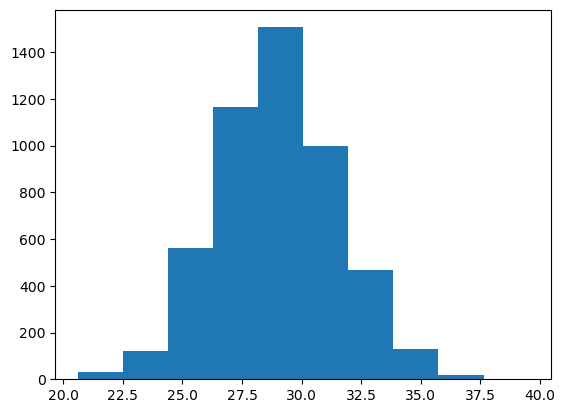

In [18]:
# Plot histogram of hero features
def bootstrap(column):
    my_samples = []
    for _ in range(5000):
        x = np.random.choice(column, size=len(column), replace=True)
        my_samples.append(x.mean())
    return my_samples

# arr = bootstrap(heroes["Special Powers"])
# arr = bootstrap(heroes["Cunning"])
arr = bootstrap(heroes["Strength"])
# arr = bootstrap(heroes["Technology"])
# arr = bootstrap(heroes["Top Trumps Rating"])
plt.hist(arr)
plt.show() 

# Model Training

In [17]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = heroes.iloc[:, 1:6].to_numpy()
y_hela = heroes["Wins Against Hela"].to_numpy()
y_loki = heroes["Wins Against Loki"].to_numpy()
y_ultron = heroes["Wins Against Ultron"].to_numpy()
y_goblin = heroes["Wins Against Green Goblin"].to_numpy()
y_octopus= heroes["Wins Against Doctor Octopus"].to_numpy()
y_venom = heroes["Wins Against Venom"].to_numpy()
y_thanos = heroes["Wins Against Thanos"].to_numpy()

villains = [y_hela, y_loki, y_ultron, y_goblin, y_octopus, y_venom, y_thanos]
villain_names = ["Hela", "Loki", "Ultron", "Green Goblin", "Doctor Octopus", "Venom", "Thanos"]

for i, test_set in enumerate(villains):
    # Train/ test split
    X_train, X_test, y_train, y_test = train_test_split(X, test_set, test_size=0.2, random_state=42)
    # random_state=42 -> heroes in test set will be Nova, Daredevil, Black Panther, Valkyrie and Iron Man

    # Train the decision tree classifier
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)

    # Evaluate the decision trees on the test set
    score = clf.score(X_test, y_test)
    print(f"Decision tree for villain '{villain_names[i]}' has {score*100} % accuracy")
    

Decision tree for villain 'Hela' has 100.0 % accuracy
Decision tree for villain 'Loki' has 80.0 % accuracy
Decision tree for villain 'Ultron' has 100.0 % accuracy
Decision tree for villain 'Green Goblin' has 100.0 % accuracy
Decision tree for villain 'Doctor Octopus' has 100.0 % accuracy
Decision tree for villain 'Venom' has 100.0 % accuracy
Decision tree for villain 'Thanos' has 100.0 % accuracy


# Visualisation

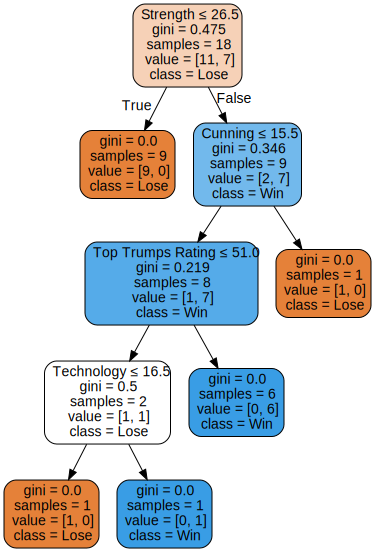

In [25]:
import graphviz

# Split training and test set
size=0.2
# X_train, X_test, y_train, y_test = train_test_split(X, y_hela, test_size=size, random_state=42) # Hela as villain
X_train, X_test, y_train, y_test = train_test_split(X, y_loki, test_size=size, random_state=42) # Loki as villain
# X_train, X_test, y_train, y_test = train_test_split(X, y_ultron, test_size=size, random_state=42) # Ultron as villain
# X_train, X_test, y_train, y_test = train_test_split(X, y_goblin, test_size=size, random_state=42) # Green Goblin as villain
# X_train, X_test, y_train, y_test = train_test_split(X, y_octopus, test_size=size, random_state=42) # Doctor Octopus as villain
# X_train, X_test, y_train, y_test = train_test_split(X, y_venom, test_size=size, random_state=42) # Venom as villain
# X_train, X_test, y_train, y_test = train_test_split(X, y_thanos, test_size=size, random_state=42) # Thanos as villain

# Train the decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Visualise the tree
dot_data = tree.export_graphviz(clf,
                                out_file=None, 
                                feature_names=heroes.columns[1:6],
                                class_names=["Lose", "Win"],
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render().replace('\\', '/') # Save tree as Source.gv.pdf
graph

# Curiously, Loki's decision tree has many different shapes (split options that lead to an equal reduction in entropy), resulting in either 100% or 80% accuracy on the test set

In [ ]:
# validation set was Black Panther and Daredevil
# most interesting to show as example are Nova, Valkerie and Iron Man vs Loki or Venom